In [1]:
pip install ecmwf-data ecmwf-opendata magpye

In [1]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("ecmwf", beta=True)

In [3]:
parameters = ['tp']
filename = 'rain.grib'
filename

'rain.grib'

In [4]:
stepS=[i for i in range(0, 144, 3)]
client.retrieve(
    date=0,
    time=0,
    step=stepS,
    #stream="oper",
    type="fc",
    #levtype="sfc",
    param=parameters,
    target=filename
)

<multiple>:   0%|          | 0.00/36.4M [00:00<?, ?B/s]

In [10]:
data = ecdata.read(filename)

In [11]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
tp,surface,0,20221115,0,"0,3,...",None,228,od,oper,fc,0001


In [12]:
data.describe('tp')

shortName,tp
name,Total precipitation
paramId,228
units,m
typeOfLevel,surface
level,0
date,20221115
time,0
step,"0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,120,123,126,129,132,135,138,141"
number,None
class,od


In [13]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20221115,0,0,fc,None,regular_ll
1,ecmf,tp,surface,0,20221115,0,0-3,fc,None,regular_ll
2,ecmf,tp,surface,0,20221115,0,0-6,fc,None,regular_ll
3,ecmf,tp,surface,0,20221115,0,0-9,fc,None,regular_ll
4,ecmf,tp,surface,0,20221115,0,0-12,fc,None,regular_ll
5,ecmf,tp,surface,0,20221115,0,0-15,fc,None,regular_ll
6,ecmf,tp,surface,0,20221115,0,0-18,fc,None,regular_ll
7,ecmf,tp,surface,0,20221115,0,0-21,fc,None,regular_ll
8,ecmf,tp,surface,0,20221115,0,0-24,fc,None,regular_ll


In [14]:
tp_12 = data.select(shortName='tp', step= 12)
tp_24 = data.select(shortName='tp', step= 24)
tp = (tp_24 - tp_12)
tp.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,tp,surface,0,20221115,0,0-24,fc,None,regular_ll


In [15]:
#msl = data.select(shortName= 'msl', step = 24)
#msl.describe()

Mean sea level pressure data has unites Pa, but we want to plot it in hPa, therefore we need to convert it.

In [16]:
#msl /= 100

We also need to convert total precipitation from metres to milimetres by multiplying with 1000.

In [17]:
tp = tp * 1000

## Plotting the data
And finally, we can plot the data on the map. 

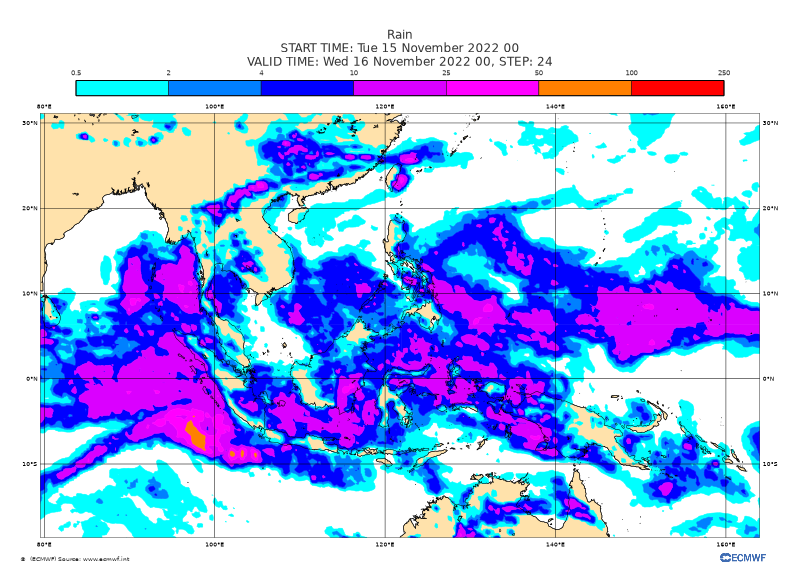

In [18]:
fig = GeoMap(area_name='south_east_asia_and_indonesia')

fig.coastlines(land_colour="cream",resolution="medium")

fig.contour_shaded(tp, style="precipitation_blue_red_250")
#fig.contour_lines(msl, style="black_i5")
fig.coastlines(resolution="high")
fig.gridlines()

fig.title(["Rain", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=tp' />",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=tp' />, STEP: <grib_info key='step' where='shortName=tp' />"])
fig.legend()
fig.footer("©  (ECMWF) Source: www.ecmwf.int ", logo='ecmwf')

fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.